<a href="https://colab.research.google.com/github/IgorNascAlves/Credit-Scoring/blob/main/notebooks/aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1

In [87]:
import pandas as pd

In [88]:
df_clientes_cadastrados = pd.read_csv('https://raw.githubusercontent.com/IgorNascAlves/Credit-Scoring/main/dados/clientes_cadastrados.csv')
df_clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [89]:
df_clientes_cadastrados.shape

(438557, 18)

In [90]:
df_clientes_cadastrados['ID_Cliente'].value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [91]:
df_clientes_cadastrados.duplicated().sum()

0

In [92]:
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [93]:
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [94]:
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_ID_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [95]:
df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts()

6293503    1
5166449    1
6210931    1
5174645    1
5170551    1
          ..
7410037    1
6357367    1
6375806    1
5683584    1
6291456    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [96]:
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [97]:
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

#Aula 2

In [98]:
colunas_continuas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [99]:
df_clientes_cadastrados_ID_unicos[colunas_continuas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


In [100]:
df_clientes_cadastrados_ID_unicos.query("Anos_empregado <= 0")[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [101]:
df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1)

In [102]:
df_clientes_cadastrados_ID_unicos[colunas_continuas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,5.780633,2.194461
std,11.472815,0.724879,1.100832e+05,6.733151,0.897194
min,21.000000,0.000000,2.610000e+04,-1.000000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

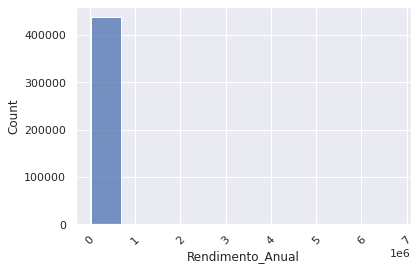

In [104]:
sns.histplot(data=df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

In [105]:
coluna = df_clientes_cadastrados_ID_unicos['Rendimento_Anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for index, valor in coluna.items():
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(index)

len(index_outliers)

12641

In [106]:
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_ID_unicos.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

In [107]:
df_clientes_cadastrados_sem_outliers[colunas_continuas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


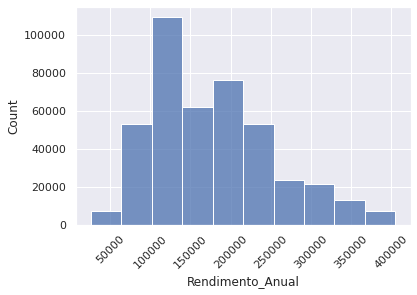

In [108]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

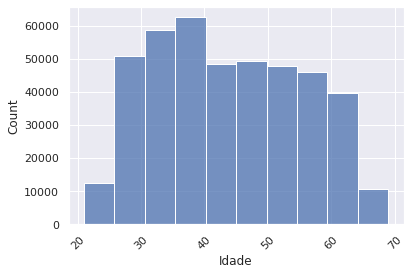

In [109]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

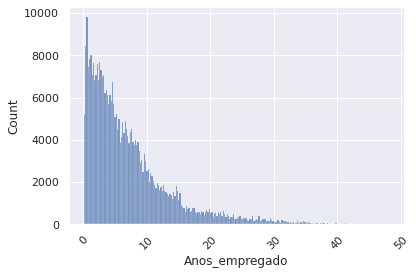

In [110]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

In [111]:
df_clientes_cadastrados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [112]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria',
                       'Categoria_de_renda', 'Grau_Escolaridade',
                       'Estado_Civil', 'Moradia', 'Tem_Celular',
                       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                       'Ocupacao']

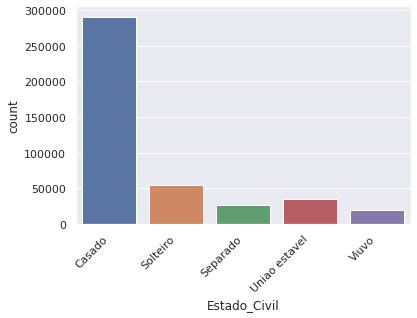

In [113]:
sns.countplot(x = 'Estado_Civil', data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

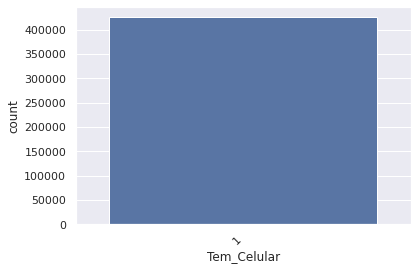

In [114]:
sns.countplot(x = 'Tem_Celular', data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

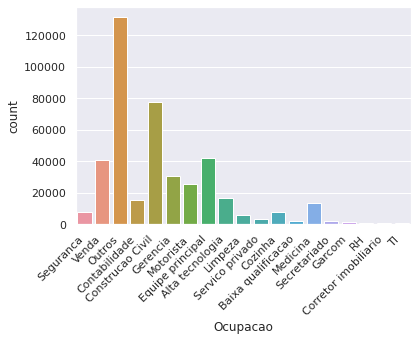

In [115]:
sns.countplot(x = 'Ocupacao', data = df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

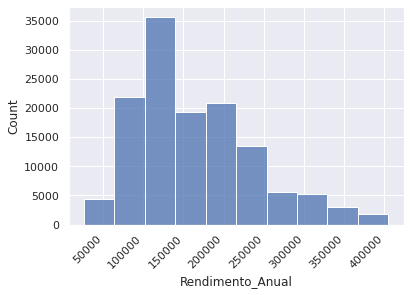

In [116]:
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [117]:
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [118]:
colunas_categoricas.remove('Genero')

In [119]:
colunas_categoricas.remove('Tem_Celular')
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

#Aula 3

In [120]:
df_clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/IgorNascAlves/Credit-Scoring/main/dados/clientes_aprovados.csv')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [121]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [122]:
df_clientes_aprovados.ID_Cliente.value_counts().shape

(45985,)

In [123]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [124]:
df_clientes_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [125]:
df_clientes_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [126]:
df_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

In [127]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [128]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [129]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [130]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [131]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [132]:
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [133]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [134]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [135]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [136]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente','Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [137]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura','Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [138]:
df_vintage = df_clientes_aprovados.groupby(['Abertura','MOB']).apply(lambda X: X['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [139]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on = ['Abertura'], how = 'left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [140]:
import numpy as np

In [141]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage      

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [142]:
df_vintage_pivot = df_vintage.pivot(index = 'Abertura',
                             columns = 'MOB',
                             values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


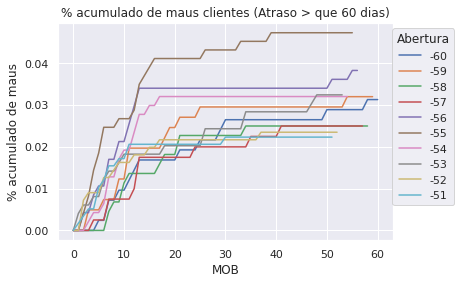

In [143]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

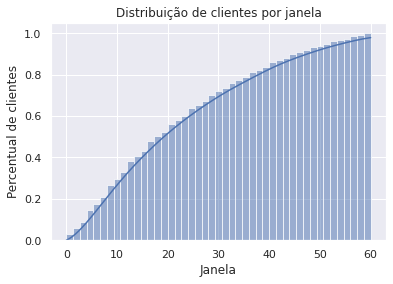

In [144]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [145]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [146]:
for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [147]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


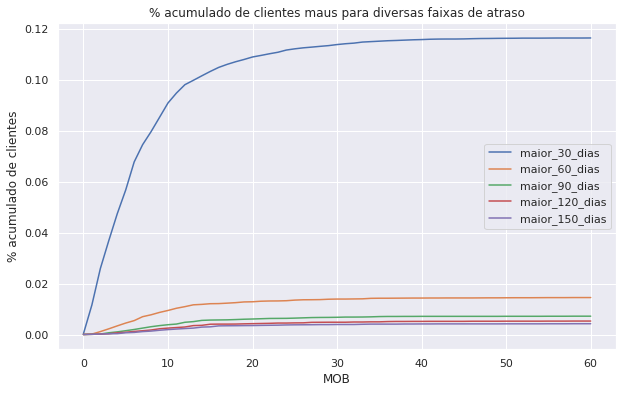

In [148]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

#Aula 4

In [149]:
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [150]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [151]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [152]:
df_registros_creditos_id.shape

(30918, 2)

In [153]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [154]:
df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [155]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

In [156]:
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_binarias                              

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [157]:
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']
colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [158]:
df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_continuas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [159]:
!pip install scikit-learn==0.23.2 imbalanced-learn==0.7.0

In [160]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [161]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats

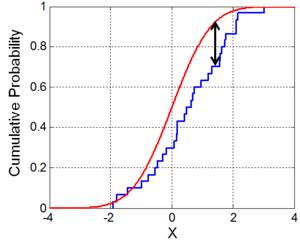

In [162]:
SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

In [163]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [164]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

In [165]:
from sklearn.pipeline import Pipeline

AUC 0.5
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


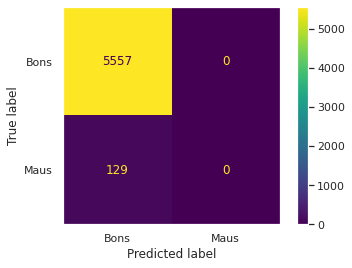


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [166]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.5847293657137516
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


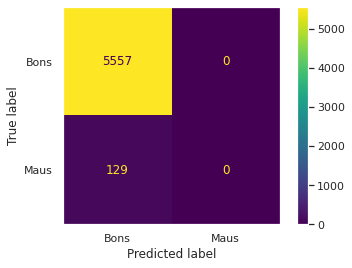


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [167]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

Oversampling e undersampling

In [168]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

AUC 0.5815864619385006
KS Ks_2sampResult(statistic=0.1290889905029898, pvalue=1.09559025330554e-41)


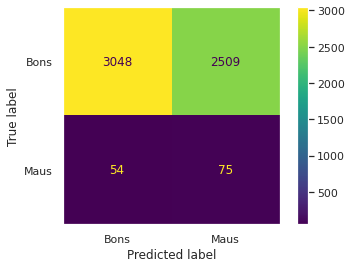


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [169]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

In [170]:
from sklearn.ensemble import RandomForestClassifier

AUC 0.8340043216670643
KS Ks_2sampResult(statistic=0.9653534998241294, pvalue=0.0)


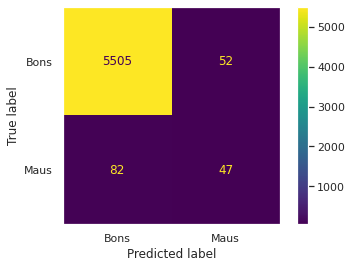


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.47      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.97      5686



In [171]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.8382939040500634
KS Ks_2sampResult(statistic=0.9794231445655998, pvalue=0.0)


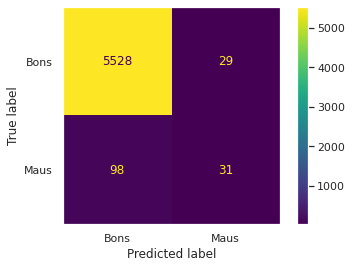


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [172]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

#Aula 5

In [173]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])

In [176]:
x = df_registro_clientes_targets.drop(['ID_Cliente', 'Mau'], axis=1)
y = df_registro_clientes_targets['Mau']

pipeline.fit(x, y)

Pipeline(steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Categoria_de_renda',
                                                    'Grau_Escolaridade',
                                                    'Estado_Civil', 'Moradia',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Tem_email', 'Ocupacao'],
                               colunas_continuas=['Idade', 'Qtd_Filhos',
                                                  'Rendimento_Anual',
                                                  'Anos_empregado',
                                                  'Tamanho_Familia'])),
                ('sampling', SMOTE(random_state=1561651)),
                ('Modelo', Random

In [177]:
from joblib import dump

In [178]:
dump(pipeline, 'modelo.joblib')

['modelo.joblib']

In [180]:
features = x.columns
features

Index(['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado',
       'Tamanho_Familia', 'Tem_Carro', 'Tem_Casa_Propria',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
       'Categoria_de_renda', 'Grau_Escolaridade', 'Estado_Civil', 'Moradia',
       'Ocupacao'],
      dtype='object')

In [181]:
dump(features, 'features.joblib')

['features.joblib']

In [182]:
lista_campos = df_registro_clientes_targets[colunas_categoricas_nao_binarias].apply(lambda x: x.unique(),axis=0)
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [183]:
dump(lista_campos, 'lista_campos.joblib')

['lista_campos.joblib']

Desafios aula 1:

Desafio 1: Explorar IDs repetidos (Atualização de cadastro ? Erro ?)

Desafio 2: Explorar as colunas (features) identificar continuas, categoricas e binarias

Desafios aula 2:

Desafio 1: Explorar outras maneiras de identificar e de tratar os outliers

Desafio 2: Criar uma função para gerar os nosso gráficos

Desafio 3: COntinuar a analise exploratoria dos dados

Desafios aula 3:

Desafio 1: Criar uma tabela com a quantidade clientes relativo a base por faixas atraso

Desafio 2: Conhecer tecnicas para resolver target

Desafios aula 4:

Desafio 1: Explorar undersampling

Desafio 2: Buscarem outras tecnicas como por exemplo: XGboost

Desafio 3: Utilizar otimização de hiperparametros e seleção features